### In this Notebook, we will implement Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent to solve a linear regression problem.

**Import Librairies**

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt



**Data creation**

In [4]:
x_train = np.linspace(0,1,10).reshape(-1,1)
y_train = x_train + np.random.normal(0,0.1,(10,1))

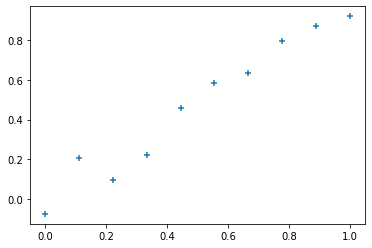

In [5]:
plt.scatter(x_train, y_train, marker = '+')

In [4]:
x_train.shape

(10, 1)

In [5]:
y_train.shape

(10, 1)

**Hypothesis**

Linear function - parameters

$$y = Xθ$$

In [6]:
def linear(X, theta):
  '''
  Inputs: X, theta
  return: y
  '''
  #X = X.reshape(-1, 1)
  y = X@theta
  return y

**Loss function**

Mean Square Error(MSE) 
$$MSE = \dfrac{1}{m}\sum_{i = 1}^{m}(y_i - y^{pred}_i)^2$$

In [7]:
def loss(y, y_pred):
  '''
  Inputs : y, y_pred

  return: MSE
  '''
  MSE = np.mean((y - y_pred)**2)

  return MSE

**Learning Algorithm**

We saw:

  1. Gradient Descent

  2. Stochastic Gradient Descent

  3. Mini Batch Gradient Descent



$$Gradient = \nabla_{\theta}Loss(\theta_k)=-2X^{T}(y-X\theta)$$

In [8]:
def gradient(X, theta, y):
  '''
  Inputs: X, theta, y

  Return: grad
  
  '''
  grad = -2*(X.T@(y - X@theta))

  return grad

**Update the parameters**

$$\theta_{k + 1} = \theta_k - \alpha\nabla_{\theta}Loss(\theta_k)$$

In [9]:
def update_parameters(theta, learning_rate, grads):
  '''
  Inputs: theta, learning_rate, grads

  Return: new theta
  
  '''

  return theta - learning_rate*grads

#### Gradient Descent

**Implementation of Gradient Descent**

In [10]:
class LinearRegression_GD:
    def __init__(self, learning_rate=0.01, epochs=40):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss_ = []

    def fit(self, X, y):
        number_samples, number_features = X.shape

        self.theta = np.zeros(number_features)

        for epoch in range(self.epochs):
          
          y_pred =  linear(X, self.theta) 

          self.Loss = loss(y, y_pred)

          grads =  gradient(X, self.theta, y)
          
          self.theta = update_parameters(self.theta, self.learning_rate, grads)
          self.loss_.append(self.Loss)   
                

    def predict(self, X):
        return np.dot(X, self.theta) 


Training and test

In [11]:
X_train = x_train
y_train = y_train

regressor_GD = LinearRegression_GD(learning_rate=0.01, epochs=40)
regressor_GD.fit(X_train, y_train)

y_pred_GD = regressor_GD.predict(X_train)
print(y_pred_GD)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.10100373 0.10100373 0.10100373 0.10100373 0.10100373 0.10100373
  0.10100373 0.10100373 0.10100373 0.10100373]
 [0.20200746 0.20200746 0.20200746 0.20200746 0.20200746 0.20200746
  0.20200746 0.20200746 0.20200746 0.20200746]
 [0.30301119 0.30301119 0.30301119 0.30301119 0.30301119 0.30301119
  0.30301119 0.30301119 0.30301119 0.30301119]
 [0.40401493 0.40401493 0.40401493 0.40401493 0.40401493 0.40401493
  0.40401493 0.40401493 0.40401493 0.40401493]
 [0.50501866 0.50501866 0.50501866 0.50501866 0.50501866 0.50501866
  0.50501866 0.50501866 0.50501866 0.50501866]
 [0.60602239 0.60602239 0.60602239 0.60602239 0.60602239 0.60602239
  0.60602239 0.60602239 0.60602239 0.60602239]
 [0.70702612 0.70702612 0.70702612 0.70702612 0.70702612 0.70702612
  0.70702612 0.70702612 0.70702612 0.70702612]
 [0.80802985 0.80802985 0.80802985 0.80802985 0.80802985 0.80802985
  0.80802985 0.80802

Curve of the Loss function

In [12]:
regressor_GD.loss_

[0.32961398194654107,
 0.28549741205148593,
 0.24737137611241358,
 0.2144224270013368,
 0.18594757456036362,
 0.16133928678760973,
 0.14007252769335374,
 0.12169355526952344,
 0.10581024056892367,
 0.09208370134460964,
 0.08022107174692777,
 0.06996925381436872,
 0.06110951744167805,
 0.05345283361155616,
 0.04683584132100048,
 0.04111736215368501,
 0.03617538813420566,
 0.0319044785978378,
 0.02821351053609964,
 0.025023734420083668,
 0.022267094021110788,
 0.019884774380840676,
 0.017825946950708205,
 0.016046685127309356,
 0.014509027045883425,
 0.0131801656358983,
 0.012031748657976862,
 0.011039273787935327,
 0.010181565841604914,
 0.009440324986642469,
 0.008799736302095287,
 0.008246132355385323,
 0.00776770159754343,
 0.007354236355090785,
 0.0069969150417881956,
 0.00668811394358001,
 0.006421244561025636,
 0.006190613038799194,
 0.00599129868308193,
 0.005819048974926328]

Text(0, 0.5, 'Loss')

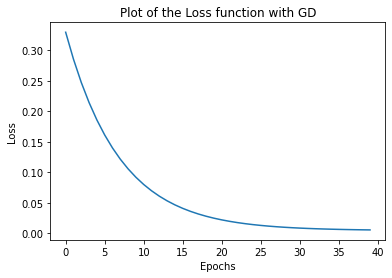

In [13]:
plt.plot(regressor_GD.loss_)
plt.title('Plot of the Loss function with GD')
plt.xlabel('Epochs')
plt.ylabel('Loss')

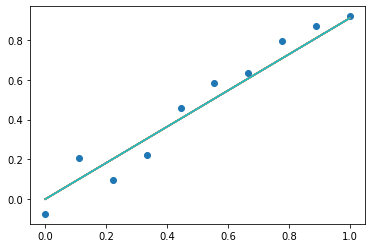

In [14]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_GD)
plt.show()

#### Implementation of the Stochastic Gradient Descent

In [15]:
def loss_SGD(y, y_pred):
  '''
  Inputs : y, y_pred

  return: MSE
  '''
  MSE = ((y - y_pred)**2)

  return MSE

In [28]:
class LinearRegression_SGD2:
    def __init__(self, learning_rate=0.01, epochs=30):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss = []

    def fit(self, X, y):
        number_samples, number_features = X.shape

        self.theta = np.zeros(number_features)

        for epoch in range(self.epochs):
      
            indexes = np.arange(number_samples)
            np.random.shuffle(indexes)
            self.Loss_int = []

            for i in indexes:
                
                y_pred =  linear(X[i], self.theta) 

                self.Loss = loss_SGD(y, y_pred)

                grads =  -2*X[i] @ (y[i] - y_pred)
               
                self.theta = update_parameters(self.theta, self.learning_rate, grads)  
                self.Loss_int.append(self.Loss)


            self.loss.append(np.mean(self.Loss_int))
                

    def predict(self, X):
        return np.dot(X, self.theta) 


In [20]:
X_test = np.linspace(0,1,6).reshape(-1,1)

In [32]:
X_train = x_train
y_train = y_train

regressor_SGD = LinearRegression_SGD2(learning_rate=0.01, epochs=30)
regressor_SGD.fit(X_train, y_train)

y_pred_SGD = regressor_SGD.predict(X_train)
print(y_pred_SGD)


[0.         0.0940134  0.18802679 0.28204019 0.37605358 0.47006698
 0.56408037 0.65809377 0.75210716 0.84612056]


Curve of the Loss function

In [33]:
regressor_SGD.loss

[0.317506892350294,
 0.29005524185382203,
 0.2670578939917439,
 0.246632421846314,
 0.22946150644821398,
 0.21848217154352093,
 0.2067381193015794,
 0.19872724810381062,
 0.19107085436756055,
 0.18620275782588153,
 0.18178209899251394,
 0.17845501650486997,
 0.17587695847840107,
 0.17404975980213866,
 0.17225849909335605,
 0.17223942951056442,
 0.1717477657515674,
 0.1719213159115305,
 0.17245898145066418,
 0.17303885257227358,
 0.17303394899454416,
 0.17384200517346982,
 0.1745727037364276,
 0.1762761569761758,
 0.17714381852160577,
 0.1782654369074661,
 0.1790210635007472,
 0.18011415145685203,
 0.18088399939712407,
 0.182426497989362]

Text(0, 0.5, 'Loss')

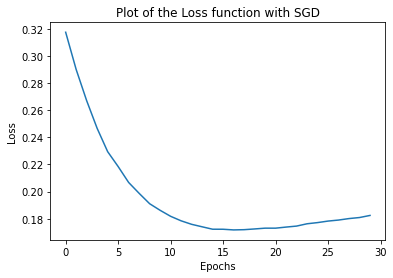

In [34]:
plt.plot(regressor_SGD.loss)
plt.title('Plot of the Loss function with SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')

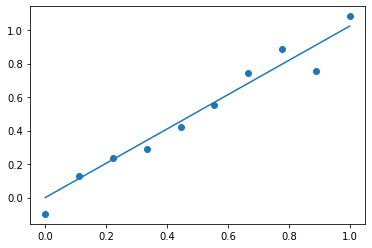

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_SGD)
plt.show()

#### Implementation of SGD with momentum

In [45]:
def momentum(V, beta, grads):
  return beta*V + (1-beta)*grads

In [46]:
class LinearRegression_SGD_Momentum:
    def __init__(self, learning_rate=0.01, epochs=30, beta = 0.99):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss = []
        self.beta = beta

    def fit(self, X, y):
        number_samples, number_features = X.shape

        self.theta = np.zeros(number_features)
        self.V = np.zeros(number_features)

        for epoch in range(self.epochs):
      
            indexes = np.arange(number_samples)
            np.random.shuffle(indexes)
            self.Loss_int = []

            for i in indexes:
                
                y_pred =  linear(X[i], self.theta) 

                self.Loss = loss_SGD(y, y_pred)

                grads =  -2*X[i] @ (y[i] - y_pred)
                
                self.V = momentum(self.V, self.beta, grads)
               
                self.theta = update_parameters(self.theta, self.learning_rate, self.V)  
                self.Loss_int.append(self.Loss)


            self.loss.append(np.mean(self.Loss_int))
                

    def predict(self, X):
        return np.dot(X, self.theta) 


In [48]:
X_train = x_train
y_train = y_train

regressor_SGD_momentum = LinearRegression_SGD_Momentum(learning_rate=0.01, epochs=30, beta = 0.99)
regressor_SGD_momentum.fit(X_train, y_train)

y_pred_SGD_momentum = regressor_SGD_momentum.predict(X_train)
print(y_pred_SGD_momentum)


[0.         0.10129537 0.20259075 0.30388612 0.40518149 0.50647687
 0.60777224 0.70906761 0.81036299 0.91165836]


Text(0, 0.5, 'Loss')

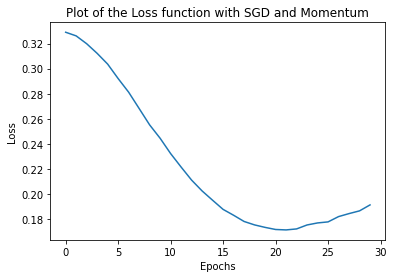

In [50]:
plt.plot(regressor_SGD_momentum.loss)
plt.title('Plot of the Loss function with SGD and Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')

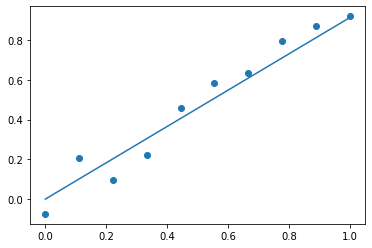

In [51]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_SGD_momentum)
plt.show()

#### Implementation of Mini Batch Gradient Descent

In [35]:
def loss_MBGD(y, y_pred):
  '''
  Inputs : y, y_pred

  return: MSE
  '''
  MSE = np.mean((y - y_pred)**2)

  return MSE

In [39]:
class MiniBatch_GD:

    def __init__(self, learning_rate=0.01, epochs=100, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.theta = None
        self.loss = []

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for i in range(self.epochs):
            # Shuffle the data
            indexes = np.arange(m)
            np.random.shuffle(indexes)
            #indexes
            X = X[indexes]
            y = y[indexes]
            self.cost_int = []
            # Split the data into batches
            for j in range(0, m, self.batch_size):
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]

                y_pred = linear(X_batch, self.theta)

                self.cost = loss_MBGD(y_batch, y_pred)

                # Calculate the gradient of the cost function
                grads =  gradient(X_batch, self.theta, y_batch) 
                # Update the parameters
                self.theta = update_parameters(self.theta, self.learning_rate, grads)
            # Calculate the cost function

                self.cost_int.append(self.cost) 
            self.loss.append(np.mean(self.cost_int))

    def predict(self, X):

        return np.dot(X, self.theta)


In [40]:
X_train = x_train
y_train = y_train

regressor_MBGD = MiniBatch_GD(learning_rate=0.01, epochs=100, batch_size=2)
regressor_MBGD.fit(X_train, y_train)

y_pred_MBGD = regressor_MBGD.predict(X_train)
print(y_pred_MBGD)


[[0.        0.       ]
 [0.1066624 0.1066624]
 [0.2133248 0.2133248]
 [0.3199872 0.3199872]
 [0.4266496 0.4266496]
 [0.533312  0.533312 ]
 [0.6399744 0.6399744]
 [0.7466368 0.7466368]
 [0.8532992 0.8532992]
 [0.9599616 0.9599616]]


In [41]:
regressor_MBGD.loss

[0.31338099140263337,
 0.27374714112409976,
 0.23664554040581826,
 0.20667862132657316,
 0.17950689193020014,
 0.15625987422567716,
 0.13687831489617056,
 0.11883357944765845,
 0.10339419428389526,
 0.09112862200942015,
 0.07948324471706239,
 0.06917547875875167,
 0.061017426932673605,
 0.05327472307972101,
 0.04685293617302511,
 0.04146663451124023,
 0.03657273661468892,
 0.032287171858290165,
 0.028556198716131853,
 0.025425489585306982,
 0.022724308367008953,
 0.02024241326105073,
 0.018300322260371087,
 0.016492264386853916,
 0.01492874239723344,
 0.013578163188031863,
 0.01244407465163232,
 0.011404203589004352,
 0.010508139019016056,
 0.009758783196933338,
 0.009065115220537972,
 0.00848436357866288,
 0.007979019058951844,
 0.007564863458108281,
 0.007184853152356401,
 0.006859603884464592,
 0.0065672863218471005,
 0.006335454280629758,
 0.006120623302230873,
 0.005949579093705949,
 0.005776283255312735,
 0.0056429095615368316,
 0.0055320501543886565,
 0.005413870701446559,
 0.00

Text(0, 0.5, 'Loss')

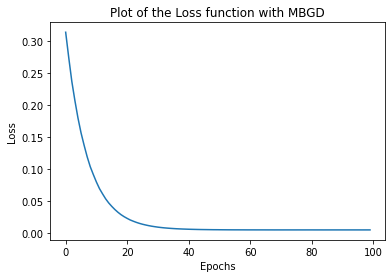

In [42]:
plt.plot(regressor_MBGD.loss)
plt.title('Plot of the Loss function with MBGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Plot using Mini Batch Gradient Descent

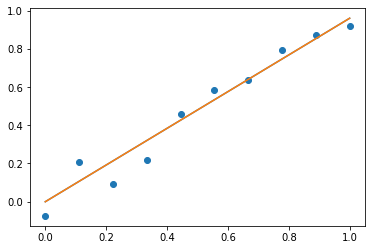

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_MBGD)
plt.show()

#### Comparison of the three results

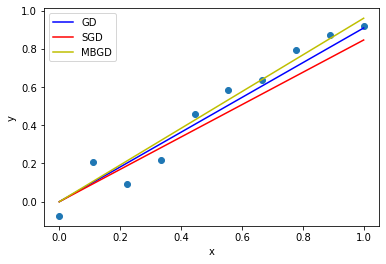

In [44]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_GD[:,0], label = 'GD', color = 'b')
plt.plot(x_train, y_pred_SGD, label = 'SGD', color = 'r')
plt.plot(x_train, y_pred_MBGD[:,0], label = 'MBGD', color = 'y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()